### <h1 style='text-align:center'>  Data Visualization in Python </h1>


Explain what's in this note

In [2]:
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [3]:
from sklearn.datasets import load_iris
iris=load_iris()
features = iris.data.T

In [9]:
len(iris)

8

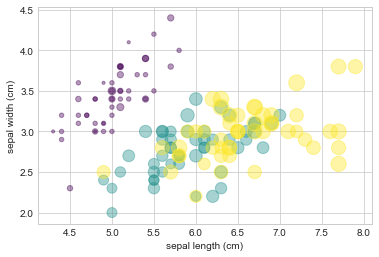

In [14]:
plt.scatter(features[0], features[1], alpha=0.4, s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

Scatter plot give the ability to simultaneously explor four different dimensions of the data: 
1. (x,y) location corresponds to septal length and width.
2. The size of hte point is related to the petal width.
3. The color reflects the target (species of the flower). 

<span style='color:#A9A9A9;'> plt.scatter(features[0], features[1], alpha=0.4, s=100*features[3], c=iris.target, cmap='viridis')


<span style='color:#A9A9A9;'>* Break down of the parameters in the above plot: 

<span style='color:#A9A9A9;'> * features[0]: values of the first feature

<span style='color:#D3D3D3;'> * features[1]: values of the second feature 

<span style='color:#A9A9A9'> * alpha=0.4: Transparency level of the markers

<span style='color:#A9A9A9'> * s=100*features[3]: This sets the size of each marker . The size s is determined by the values in features[3], which represents the fourth feature (e.g., petal width) for all samples. Each value in features[3] is multiplied by 100 to scale the marker sizes, making them more visually discernible.

<span style='color:#A9A9A9;'> *c=iris.target: This sets the color of the markers based on the class labels in iris.target. 

<span style='color:#A9A9A9;'> *cmap='viridis': This specifies the colormap used to map the c values to colors. 'viridis' is a popular colormap choice in matplotlib. </span>

#### Visualizing Uncertainties ####

One standard way to visualize ndertainties is using an error bar. 

In [20]:
x= np.linspace(0,10.50)

In [24]:
dy=0.8
y = np.sin(x)+dy*np.random.randn(50)

<ErrorbarContainer object of 3 artists>

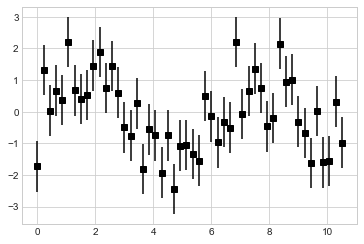

In [29]:
plt.errorbar(x, y, yerr=dy, fmt='sk') #format code s for square and k for black 

Customize error plot!

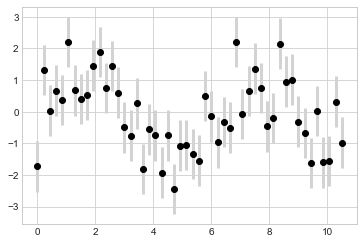

In [30]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0);

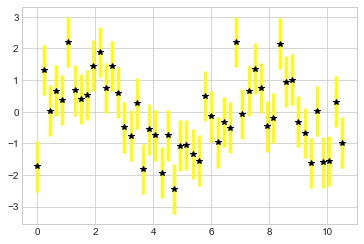

In [32]:
plt.errorbar(x, y, yerr=dy, fmt='*k', ecolor='yellow', elinewidth=3, capsize=0);

#### D Visualization ####

* plt.contour  

* plt.contourf  filled contour   

* plt.imshow for showing images

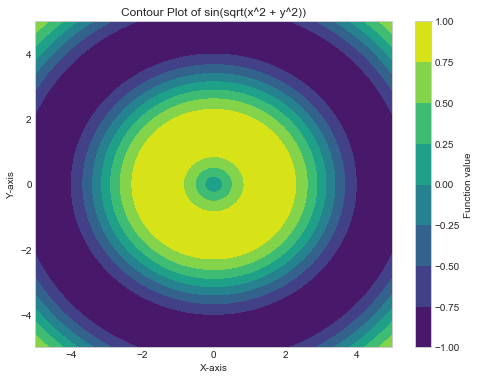

In [33]:
# Define coordinate vectors
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

# Create the grid
X, Y = np.meshgrid(x, y)

# Define a function to evaluate on the grid
Z = np.sin(np.sqrt(X**2 + Y**2))

# Plot the function
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, cmap='viridis')
plt.colorbar(label='Function value')
plt.title('Contour Plot of sin(sqrt(x^2 + y^2))')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

In [34]:
def f(x,y): 
    return np.sin(x)**10 + np.cos(10 + y * x) * np.cos(x)

In [35]:
x = np.linspace(0,5,50)
y = np.linspace(0,5,40)

In [36]:
X,Y = np.meshgrid(x,y)

In [37]:
Z=f(X,Y)

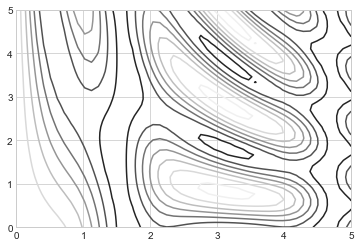

In [39]:
plt.contour(X,Y,Z)

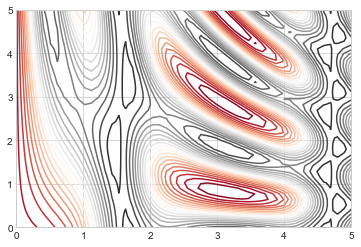

In [43]:
plt.contour(X,Y,Z, 20, cmap='RdGy') # 20 equally spaced intervals within the data range and RdGy red gray 

RdGy is a good choice for divergent data

***

**Filled Contour and Colorbar**


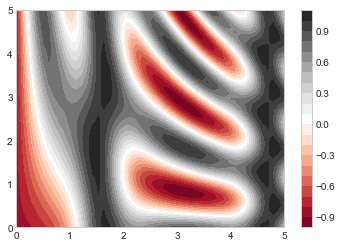

In [45]:
plt.contourf(X,Y,Z, 20, cmap='RdGy')
plt.colorbar();

### <h1 style='text-align:center;'>  Histograms </h1> ### 

Bar graphs and histograms may appear the same, but they are different.

**Key Differences** 


1. Type of Data: 

    * Histogram: Suitable for continuous numerical data.
    * Bar Graph: Suitable for categorical data.  


2. Bar Appearance:

    * Histogram: Bars touch each other, showing continuous data ranges.  

    * Bar Graph: Bars are separated by gaps, showing distinct categories.  


3. X-Axis Representation:

    * Histogram: Represents ranges of numerical data (bins).  

    * Bar Graph: Represents distinct categories.


**When to Use**  

Use a histogram when you want to understand the distribution, shape, and spread of continuous numerical data.
Use a bar graph when you want to compare different categories or groups of data.
.

In [47]:
rng = np.random.default_rng(1701)
data = rng.normal(size=1000)

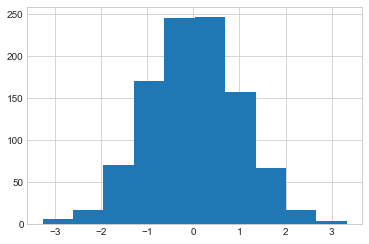

In [48]:
plt.hist(data);

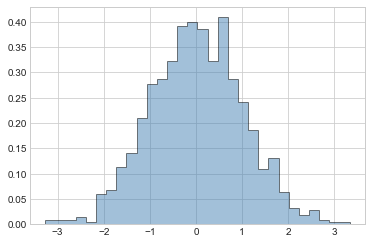

In [50]:
plt.hist(data, bins=30, density=True, alpha=0.5, histtype="stepfilled", color='steelblue', edgecolor='k');

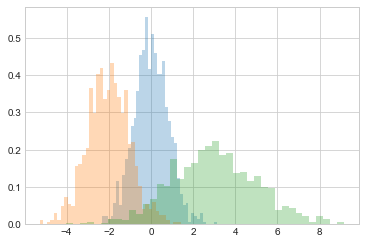

In [53]:
x1 = rng.normal(0, 0.8, 1000)
x2 = rng.normal(-2, 1, 1000)
x3 = rng.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)

plt.hist(x2, **kwargs)

plt.hist(x3, **kwargs);

** helps unpack the kwarg dictionary and pass its key-value pairs as keyword arguments to the plt.hist() function.

**Customizing Legend**

ax.legend(loc = 'upper left') can also used 'lower center' 

plt.legend(loc= 'lower right') 

ax.legend(frameon=True, fancybox=True, framealpha=1, shadow=True, boarderpad=1)

ncol= number of columns you want your legend to appear in 

#### Subplots #### 

plt.text(x-position, y-position, text)  


ax.text(x-position, y-position, text )

subplots_adjust adjusts space between subplots

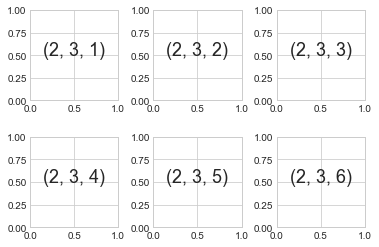

In [55]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4) # adjusts spacing between plots so that they don't overlap
for i in range(1,7):
    ax=fig.add_subplot(2,3,i)
    ax.text(0.5, 0.5, str((2,3,i)),
           fontsize=18, ha='center')

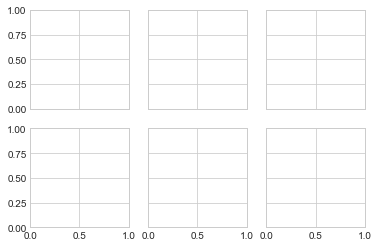

In [56]:
fig, ax = plt.subplots(2,3, sharex='col', sharey='row')

#### plt.GridSpec: More Complicated Arrangements #### 

To go beyond a regular grid to subplots that span multiple rows and columns, plt.GridSpec() is the best tool. The **plt.GridSpec()** object does not create a plot by itself; it is simply a convenient interface that is recognized by the plt.subplot() command. For example, a gridspec for a grid of two rows and three columns with some specified width and height space looks like this:

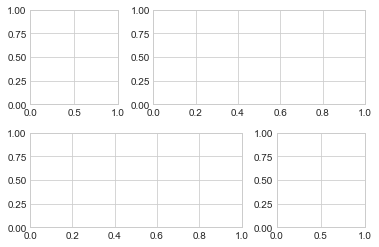

In [3]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

# specify the location an dextents: 
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);


Example with data 

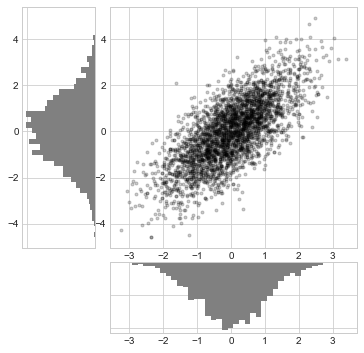

In [4]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()